<a href="https://colab.research.google.com/github/tarunkv169/Stock_price_prediction_using_fbprophet/blob/main/Stock_price_prediction_using_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###STOCK PRICE PREDICTION USING FACEBOOK PROPHET
In order to predict the price of Tesla 30 days in advance, this script tends to produce a Facebook Prophet Machine learning model.

    Importing all required libraries
    Importing the Yahoo Finance dataset
    Utilizing Plotly express for data visualisation
    Preparing Data for Modeling
    Creating Facebook Prophet Model
    Forecasting Stocks data for next 30 days
    Downlaoding the predicted data

###1. Importing all the necessary libraries
    import libraries ( pandas,fbprophet,ploty.express )
    initialize ploty.io

In [ ]:
!pip install prophet



In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import plotly.io as pio

In [ ]:
pio.renderers.default = "colab"

###2. Importing the dataset from Yahoo Finance
    download tsla stock dataset from yahoo finance
    import dataset using pandas,info,describe

In [ ]:
df = pd.read_csv("AAPL.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


###3. data visualization using ploty
    px.area(df,x="date",y="Close")
    px.line(---)
    px.area(df,x="date",y="Volume")
    px.bar(df,y="Volume")
    px.box(df,y="Close")

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df,y="Close")

###4. data preparing and preprocessing
    columns = ["date","Close"]
    ndf = pd.dataframe(df,columns=columns)
    prophet_df = ndf.rename(columns={"date":"ds","Close":"y"})

In [ ]:
columns_needed_to_predict = ["Date","Close"]

In [ ]:
ndf = pd.DataFrame(df,columns=columns_needed_to_predict)

In [ ]:
ndf

,Date,Close
0,2012-01-03,58.747143
1,2012-01-04,59.062859
2,2012-01-05,59.718571
3,2012-01-06,60.342857
4,2012-01-09,60.247143
...,...,...
2006,2019-12-23,284.000000
2007,2019-12-24,284.269989
2008,2019-12-26,289.910004
2009,2019-12-27,289.799988


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

###5. training of model
    m = Prophet()
    m.fit(prophet_df)

In [ ]:
m = Prophet()

###6. prediction/forecasting
    future = m.make_future_dataframe(periods=30)
    forecast = m.predict(future)
    px.line(forecast,x="ds",y="yhat")
    fig = m.plot(forecast,xlabel="ds",ylabel="y")
    fig2 = m.plot_components(forecast)

In [ ]:
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98abpruw/uk67pfvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98abpruw/luy46h5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5263', 'data', 'file=/tmp/tmp98abpruw/uk67pfvb.json', 'init=/tmp/tmp98abpruw/luy46h5u.json', 'output', 'file=/tmp/tmp98abpruw/prophet_modelaadfr_tz/prophet_model-20250113180501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,76.727187,59.551487,88.491882,76.727187,76.727187,-2.614477,-2.614477,-2.614477,3.750008,3.750008,3.750008,-6.364485,-6.364485,-6.364485,0.0,0.0,0.0,74.112709
1,2012-01-04,76.749990,58.064759,88.194309,76.749990,76.749990,-3.322603,-3.322603,-3.322603,3.622076,3.622076,3.622076,-6.944679,-6.944679,-6.944679,0.0,0.0,0.0,73.427387
2,2012-01-05,76.772793,56.496957,87.243282,76.772793,76.772793,-3.823859,-3.823859,-3.823859,3.672802,3.672802,3.672802,-7.496661,-7.496661,-7.496661,0.0,0.0,0.0,72.948934
3,2012-01-06,76.795596,57.261775,87.558151,76.795596,76.795596,-4.509553,-4.509553,-4.509553,3.508134,3.508134,3.508134,-8.017687,-8.017687,-8.017687,0.0,0.0,0.0,72.286043
4,2012-01-09,76.864006,56.938317,86.208579,76.864006,76.864006,-5.715159,-5.715159,-5.715159,3.659523,3.659523,3.659523,-9.374682,-9.374682,-9.374682,0.0,0.0,0.0,71.148847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2020-01-25,225.566708,189.956682,219.636070,225.565041,225.583065,-20.447828,-20.447828,-20.447828,-9.106269,-9.106269,-9.106269,-11.341558,-11.341558,-11.341558,0.0,0.0,0.0,205.118881
2037,2020-01-26,225.646344,190.525941,219.101879,225.641431,225.672838,-20.338654,-20.338654,-20.338654,-9.106274,-9.106274,-9.106274,-11.232380,-11.232380,-11.232380,0.0,0.0,0.0,205.307690
2038,2020-01-27,225.725980,203.927108,232.912943,225.714090,225.761545,-7.445165,-7.445165,-7.445165,3.659523,3.659523,3.659523,-11.104689,-11.104689,-11.104689,0.0,0.0,0.0,218.280814
2039,2020-01-28,225.805615,204.586827,234.482883,225.787592,225.846351,-7.209821,-7.209821,-7.209821,3.750008,3.750008,3.750008,-10.959829,-10.959829,-10.959829,0.0,0.0,0.0,218.595794


In [ ]:
px.line(forecast,x="ds",y="yhat")

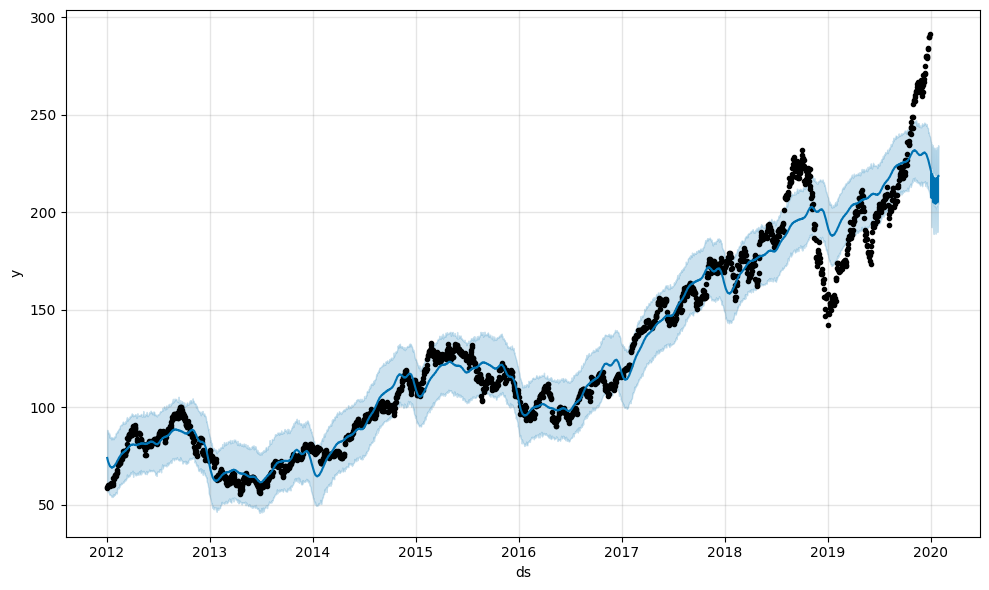

In [ ]:
fig=m.plot(forecast,xlabel="ds",ylabel="y")

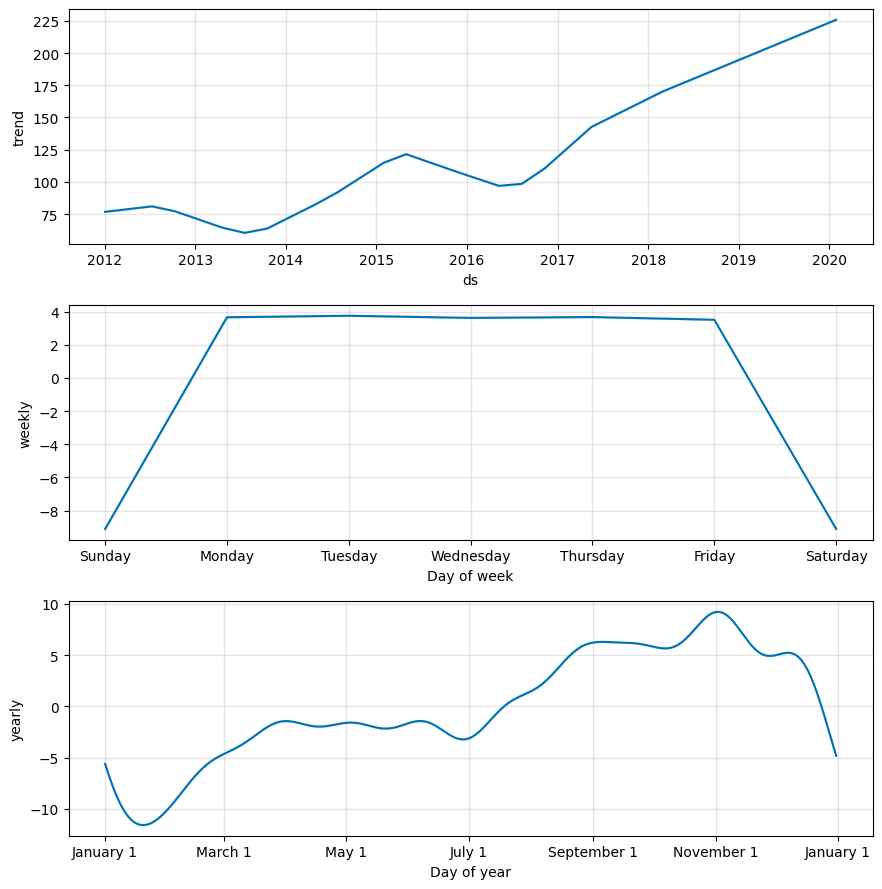

In [ ]:
fig2=m.plot_components(forecast)

###7. Forecast Evaluation using Google Finance in Google Sheets
   ##download forecast as csv from google colab
    
    from google.colab import files
    forecast.to_csv('forecast.csv')
    files.download('forecast.csv')

    1.open google-sheets,open blank sheet
    2.enter in cell 'googlefinancial->put acc to suggested(ticker,price,startdate,enddate)-------->give us date+time & close of that ticker, from finance of google---->format the date+time to date
    3.import our downloaded csv-->took predicted(yhat) col---->add col next to google financed---->format the col to number
    4.select whole data and insert graph---> u will get actual and pred close
    5.took yhat last 30days --->again insert graph-->customize to data labels

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###8. Conclusion-  Stock Analysis of Tesla using Yahoo Finance
    1.analyse the terms of a ticker in yahoo finance

###9. Automating stock forecasting- for other stocks
    1.download other ticker stock dataset from yahoo finance
    2.make a copy of our colab_notebook-->put dataset where pd is reading
    3.when we run all code together we get our forecast file downloaded